# FRAUD DETECTION IN BANK MARKETING DATASET FOR LEARNING

In [7]:
# -------------------------------------------
# Import Required Libraries
# -------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [8]:
# -------------------------------------------
# Load Dataset
# -------------------------------------------
df = pd.read_csv("bank.csv")

In [9]:
# -------------------------------------------
# Initial Exploration
# -------------------------------------------
print("Shape of dataset:", df.shape)

Shape of dataset: (45211, 17)


In [10]:
print("\nData Types:\n", df.dtypes)


Data Types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
class        object
dtype: object


In [14]:
print("\nSample Data:\n", df.head())


Sample Data:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome class  
0  unknown    5   may       261         1     -1         0  unknown    no  
1  unknown    5   may       151         1     -1         0  unknown    no  
2  unknown    5   may        76         1     -1         0  unknown    no  
3  unknown    5   may        92         1     -1         0  unknown    no  
4  unknown    5   may       198         1     -1         0  unknown    no  


In [15]:
# -------------------------------------------
# Simulate Fraud Column
# -------------------------------------------
df["fraud"] = (
    ((df["default"] == "yes") | (df["loan"] == "yes")) &
    (df["balance"] > 1000)
).astype(int)

print("\nFraud value counts:\n", df["fraud"].value_counts())




Fraud value counts:
 fraud
0    43576
1     1635
Name: count, dtype: int64


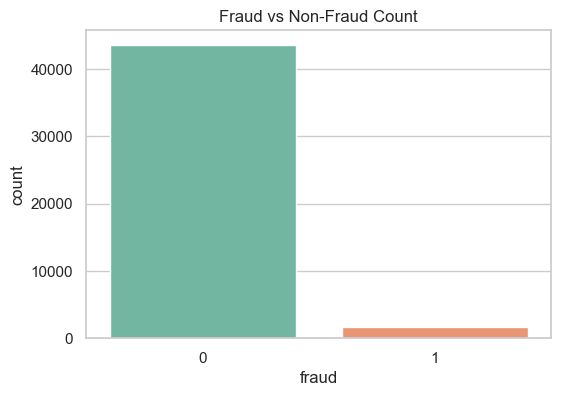

In [11]:
# -------------------------------------------
# Visualizing Fraud Distribution
# -------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='fraud', data=df, palette='Set2')
plt.title("Fraud vs Non-Fraud Count")
plt.show()

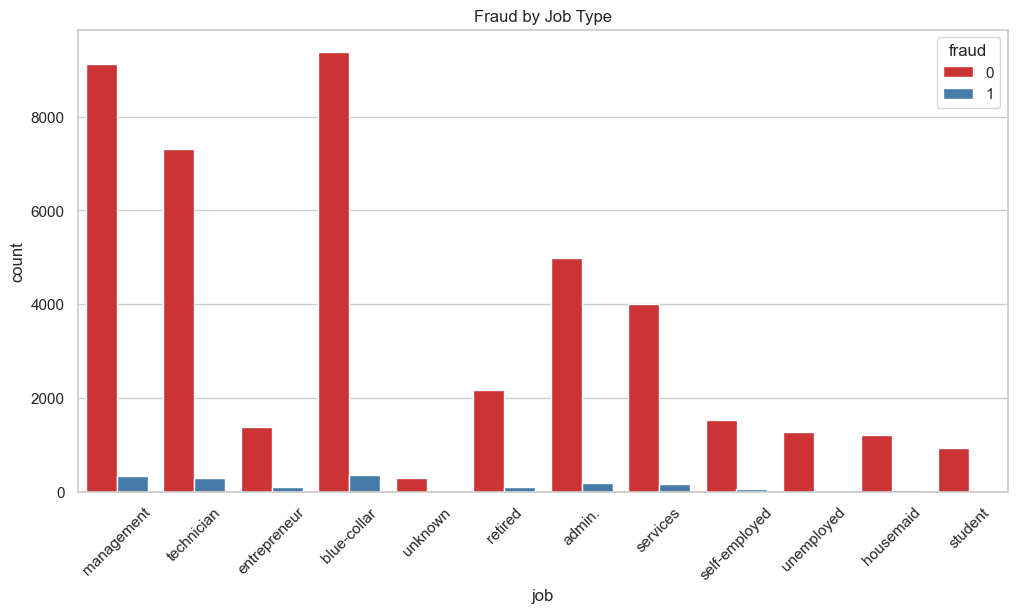

In [12]:
# -------------------------------------------
#  Fraud Analysis by Job
# -------------------------------------------
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="job", hue="fraud", palette="Set1")
plt.title("Fraud by Job Type")
plt.xticks(rotation=45)
plt.show()

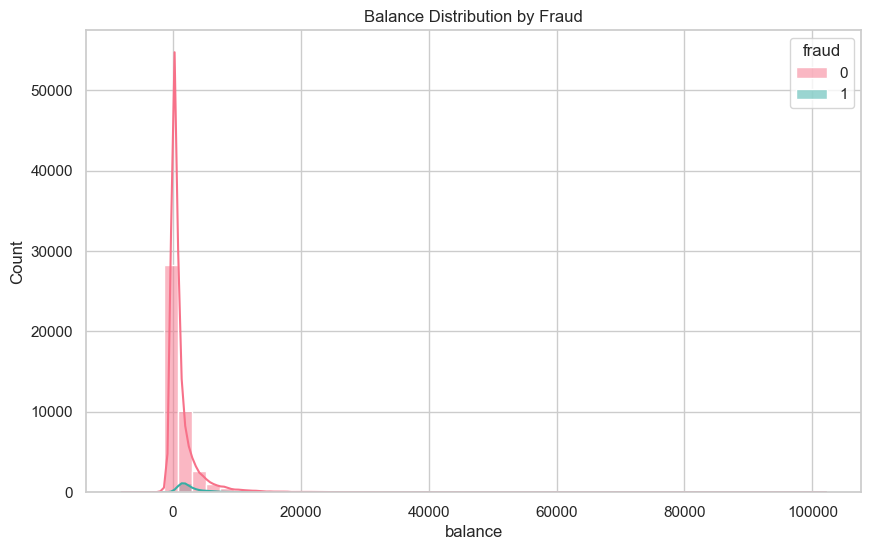

In [16]:
# -------------------------------------------
#  Balance Distribution by Fraud
# -------------------------------------------
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="balance", hue="fraud", bins=50, kde=True, palette="husl")
plt.title("Balance Distribution by Fraud")
plt.show()

In [24]:
# -------------------------------------------
# Encode Categorical Columns
# -------------------------------------------
df_encoded = pd.get_dummies(df.drop(columns=["class"]), drop_first=True)



In [25]:
# -------------------------------------------
# Train-Test Split
# -------------------------------------------
X = df_encoded.drop(columns=["fraud"])
y = df_encoded["fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [26]:
# -------------------------------------------
# Feature Scaling (for Isolation Forest)
# -------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# -------------------------------------------
# Random Forest Classifier
# -------------------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [28]:
# -------------------------------------------
# Evaluation
# -------------------------------------------
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, y_pred))



Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13073
           1       1.00      1.00      1.00       491

    accuracy                           1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564



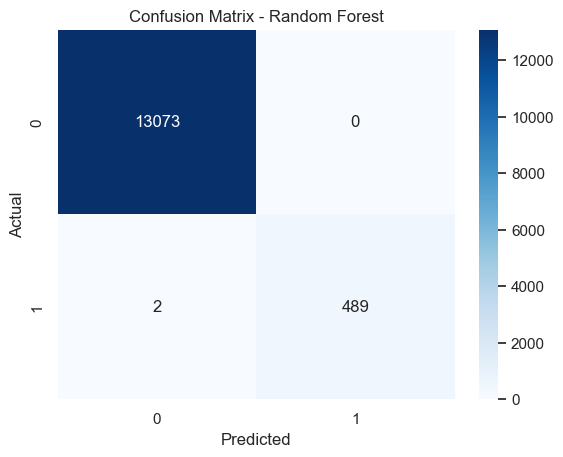

In [29]:
# -------------------------------------------
# Confusion Matrix
# -------------------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

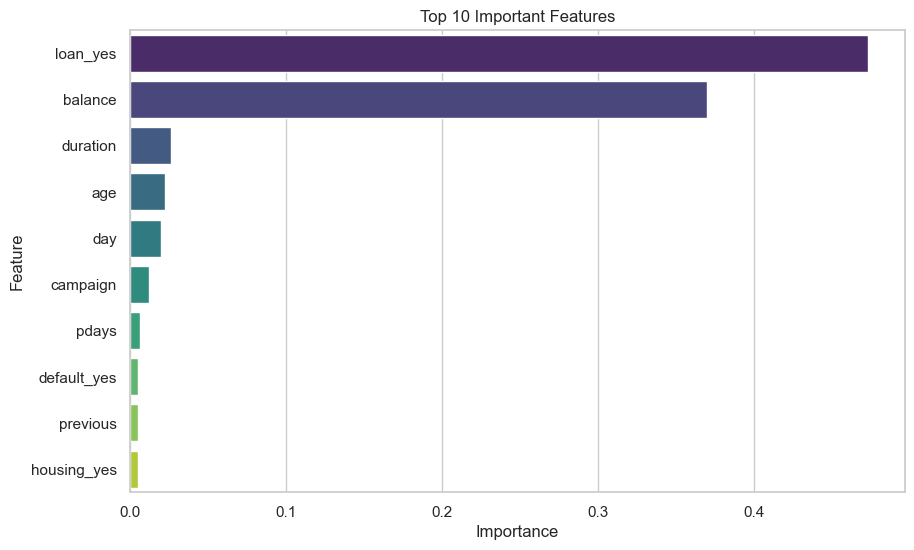

In [30]:
# -------------------------------------------
# Feature Importances
# -------------------------------------------
importances = rf.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(10), palette="viridis")
plt.title("Top 10 Important Features")
plt.show()

In [31]:
# -------------------------------------------
# Isolation Forest (Anomaly Detection)
# -------------------------------------------
iso = IsolationForest(contamination=0.02, random_state=42)
iso_preds = iso.fit_predict(X_scaled)
df["anomaly"] = (iso_preds == -1).astype(int)


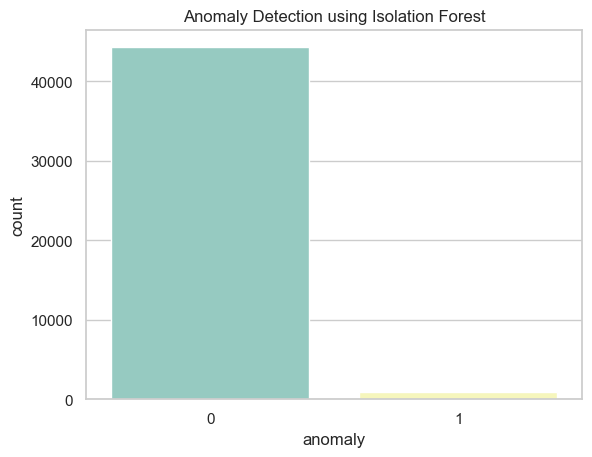

In [32]:
# -------------------------------------------
# Anomaly Distribution
# -------------------------------------------
sns.countplot(x='anomaly', data=df, palette='Set3')
plt.title("Anomaly Detection using Isolation Forest")
plt.show()



## Project Insights


    * • Total records: 45,211 rows and  17 columns with clean and no missing values.
    * • Created 'fraud' column: 1,635 fraud cases, 43,576 non-fraud.
    * • Fraud mostly linked to jobs: management, technician, blue-collar, admin, and services.
    * • Fraud cases usually have balance less than 1,500.
    * • 'Loan' marked as 'yes' appears frequently in fraud cases.
    * • Random Forest gave 100% accuracy, precision, recall, and F1-score.
    * • Confusion matrix confirms: 13,073 non-fraud and 491 fraud predicted correctly.
    * • Isolation Forest supported fraud pattern through anomaly detection
